In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import talib
import mpl_finance as mpf
%matplotlib inline
import seaborn as sns
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta
import csv
plt.rcParams['font.family']='SimHei' # 顯示中文('SimHei' for MacOS)

'''today = date.today()
print(today.strftime("%Y%m%d"))'''

fina=input('輸入個股代碼(ex:1101)：')
date=input('輸入日期(ex:2018/10/01)：')

inday=datetime.datetime.strptime(date,"%Y/%m/%d")
inday=datetime.datetime.strptime(inday.strftime('%Y/%m/'+'01'),"%Y/%m/%d")
ago=[(inday+relativedelta(years=-1)+relativedelta(months=+i)).strftime('%Y%m%d') for i in range(13) ]
ago

輸入個股代碼(ex:1101)：1101
輸入日期(ex:2018/10/01)：2016/05/09


['20150501',
 '20150601',
 '20150701',
 '20150801',
 '20150901',
 '20151001',
 '20151101',
 '20151201',
 '20160101',
 '20160201',
 '20160301',
 '20160401',
 '20160501']

In [2]:
from io import StringIO
month = ago[0]
data = {
    'response':'json',
    'date': month,
    'stockNo':fina,
}
dres = requests.get('https://www.twse.com.tw/exchangeReport/STOCK_DAY?', params=data)
result = json.loads(dres.text)
df1 = pd.DataFrame(result['data'])
df1.columns = result['fields']
df1['開盤價']=df1['開盤價'].str.replace(',','').astype(float)
df1['最高價']=df1['最高價'].str.replace(',','').astype(float)
df1['最低價']=df1['最低價'].str.replace(',','').astype(float)
df1['收盤價']=df1['收盤價'].str.replace(',','').astype(float)
df1

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,104/05/04,"2,284,017","99,434,760",43.80,43.90,43.40,43.40,-0.20,"1,039"
1,104/05/05,"3,266,378","141,962,573",43.60,43.80,43.30,43.30,-0.10,"1,357"
2,104/05/06,"2,957,119","128,039,862",43.30,43.45,43.15,43.15,-0.15,"1,525"
3,104/05/07,"7,360,122","314,861,533",43.15,43.20,42.35,42.40,-0.75,"3,123"
4,104/05/08,"4,382,797","187,387,936",42.50,43.05,42.50,42.55,+0.15,"1,836"
5,104/05/11,"4,064,617","173,980,169",42.60,43.00,42.60,42.65,+0.10,"1,939"
6,104/05/12,"4,602,944","197,311,536",43.00,43.05,42.60,42.85,+0.20,"2,013"
7,104/05/13,"4,723,786","203,417,794",42.85,43.35,42.85,43.20,+0.35,"2,001"
8,104/05/14,"4,202,683","179,436,737",43.00,43.00,42.50,42.70,-0.50,"2,247"
9,104/05/15,"4,962,439","211,254,740",42.70,42.95,42.35,42.50,-0.20,"1,898"


In [7]:
from io import StringIO
import time
for month in ago[1:13] :
    data = {
        'response':'json',
        'date': month,
        'stockNo':fina,
    }
    dres = requests.get('https://www.twse.com.tw/exchangeReport/STOCK_DAY?', params=data)
    result = json.loads(dres.text)
    tmp = pd.DataFrame(result['data'])
    tmp.columns = result['fields']
    tmp['開盤價']=tmp['開盤價'].str.replace(',','').astype(float)
    tmp['最高價']=tmp['最高價'].str.replace(',','').astype(float)
    tmp['最低價']=tmp['最低價'].str.replace(',','').astype(float)
    tmp['收盤價']=tmp['收盤價'].str.replace(',','').astype(float)
    df1=df1.append(tmp).reset_index(drop=True)
    time.sleep(3)
df1

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,104/05/04,"2,284,017","99,434,760",43.80,43.90,43.40,43.40,-0.20,"1,039"
1,104/05/05,"3,266,378","141,962,573",43.60,43.80,43.30,43.30,-0.10,"1,357"
2,104/05/06,"2,957,119","128,039,862",43.30,43.45,43.15,43.15,-0.15,"1,525"
3,104/05/07,"7,360,122","314,861,533",43.15,43.20,42.35,42.40,-0.75,"3,123"
4,104/05/08,"4,382,797","187,387,936",42.50,43.05,42.50,42.55,+0.15,"1,836"
5,104/05/11,"4,064,617","173,980,169",42.60,43.00,42.60,42.65,+0.10,"1,939"
6,104/05/12,"4,602,944","197,311,536",43.00,43.05,42.60,42.85,+0.20,"2,013"
7,104/05/13,"4,723,786","203,417,794",42.85,43.35,42.85,43.20,+0.35,"2,001"
8,104/05/14,"4,202,683","179,436,737",43.00,43.00,42.50,42.70,-0.50,"2,247"
9,104/05/15,"4,962,439","211,254,740",42.70,42.95,42.35,42.50,-0.20,"1,898"


findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.


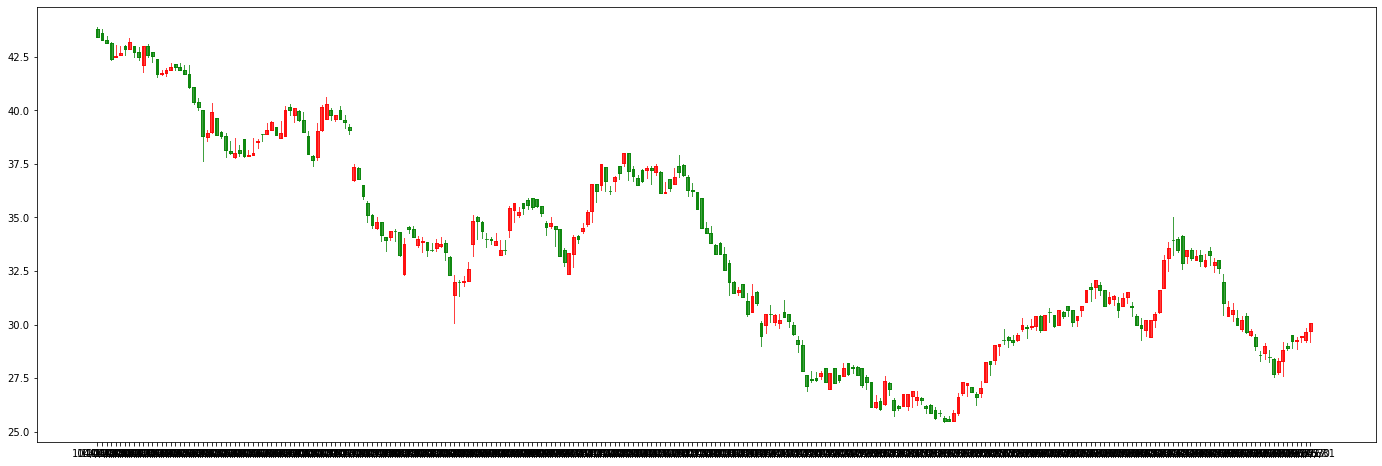

In [8]:
fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(df1['日期']), 1))
ax.set_xticklabels(df1['日期'][::1])
mpf.candlestick2_ochl(ax, df1['開盤價'], df1['收盤價'], df1['最高價'],
                      df1['最低價'], width=0.6, colorup='r', colordown='g', alpha=0.75); 